In [1]:
import pandas as pd
import numpy as np
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [2]:
%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

[WinError 3] El sistema no puede encontrar la ruta especificada: "'/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'"
c:\Users\anaso\OneDrive\Escritorio\repositorios\InteligenciaArtificial\Bayes-AD


C:\Users\anaso\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


# Clasificador de Bayes

A diferencia de los clasificadores vistos hasta ahora, el clasificador de Bayes es de **tipo estadístico**.

Podemos definir un clasificador estadístico como un conjunto de funciones discriminantes $g_i$. El un número de funciones $g_i$ es igual al número de clases $c$ presentes en los datos.

Cada una de estas funciones $g_i$ va a tomar como entrada un patrón y va a devolver como salida un número real que será el máximo valor entre las salidas de cada función discriminante. Este número representa la probabilidad de pertenencia del patrón a una clase.

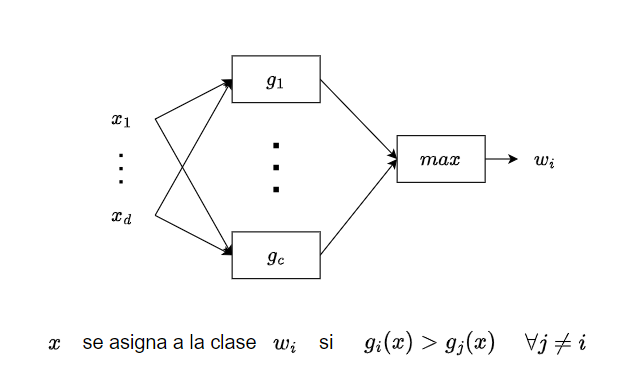

In [3]:
display(Image(filename='./2_imagenes/funciones discriminantes.png', width=600))

El clasificador de Bayes utiliza como función discriminante, las **probabilidades a posteriori**.
A continuación vamos a repasar algunos conceptos para entender esta función discriminante.

### **Probabilidad a priori $P(w_i)$**: “Probabilidad de observar la etiqueta sin saber cual es el valor del patrón”

se calcula como la proporción de muestras de $w_i$ respecto al total

- $0 \leq P(w_i) \leq 1, \text{ para }i=1,…,c$
- $\sum\limits_{1=1}^{c}P(w_1)=1$

***Ej. Cuál es la probabilidad de encontrar individuos anémicos en una población de individuos anémicos + sanos***

### **Densidad condicional $P(x|w_i)$ (likelihood)**: “Probabilidad de observar un patrón x sabiendo de qué clase estoy sacando la muestra (la etiqueta)”


***Ej. Tengo 2 grupos etiquetados con sanos y anémicos, cuál es la probabilidad de sacar un conteo de glóbulos rojos 2.000.000, conociendo la clase a la que pertenece la muestra.***

### **Probabilidad conjunta $P(x,w_i)$**: “Probabilidad de observar la muestra x con la etiqueta $w_i$”

$$
P(x,w_i) = P(w_i)P(x|w_i)
$$

***Ej. Ahora tengo todas las muestras de los 2 grupos mezcladas, cuál es la probabilidad de sacar un conteo de glóbulos rojos de 2.000.000 y que sea un individuo sano***

### **Probabilidad incondicional $P(x)$ o Marginal** : “Probabilidad de observar la muestra x sin saber cuál es su etiqueta”

Suma de las probabilidades conjuntas para cada clase

$$
p(x) = \sum\limits_{j=1}^{c}P(x,w_j) = \sum\limits_{j=1}^{c}P(w_j) P(x|w_j)
$$
***Ej. cuál es la probabilidad de sacar un conteo de glóbulos rojos de 2.000.000 sin importar la clase***

### **Probabilidad a posteriori $P(w_i|x)$**: “Probabilidad de observar una etiqueta $w_i$  conociendo el valor de la muestra x”

Se obtiene mediante la regla de Bayes:

$$
P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)} = \frac{P(x|w_i)P(w_i)}{\sum\limits_{j=1}^{c}P(x|w_j)P(w_j)}
$$

$0 \leq P(w_i|x) \leq 1$,    
$\sum\limits_{i=1}^{c}P(w_i|x)=1$

# Clasificador Bayes

Es un clasificador que utiliza las **probabilidades a posteriori** como funciones discriminantes

La salida del clasificador será la clase que maximiza la expresión:

$$g_i(x) = P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)}$$

## Ejemplo de Aplicación: OCR de dígitos manuscritos 0 y 1

Vamos a ver un ejemplo simple de la aplicación de un clasificador de Bayes para el reconocimiento óptico de caracteres (OCR) de 2 dígitos manuscritos 0 y 1.

A continuación tenemos las imágenes binarizadas de ambos dígitos.

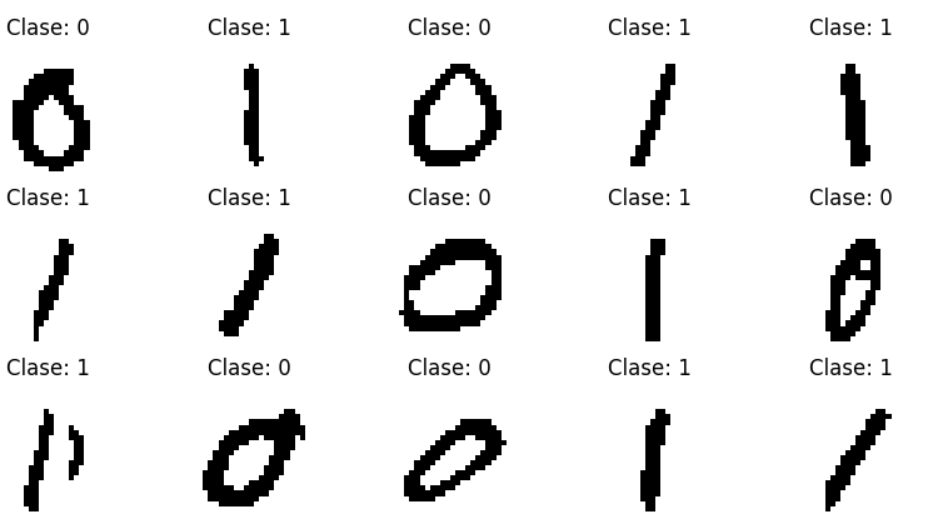

In [4]:
# Figura 1
display(Image(filename='./2_imagenes/digitos_0_1.png', width=800))

Estos dígitos inicialmente están guardados en vectores de dimensión (1,784) que conforman imágenes de 28x28 píxeles con intensidades entre 0 y 255. A los cuales se les aplicó un umbral de 127 para binarizarlas.

Posteriormente, para simplificar la tarea de clasificación, transformo los datos a una sola dimensión. Para esto, se mide sobre cada dígito el **brillo global** sumando el número de píxeles en blanco que posee la imagen.

Esta medida para cada dígito permitirá separar las clases de forma simple como se puede ver en los siguientes histogramas del brillo global para cada dígito:

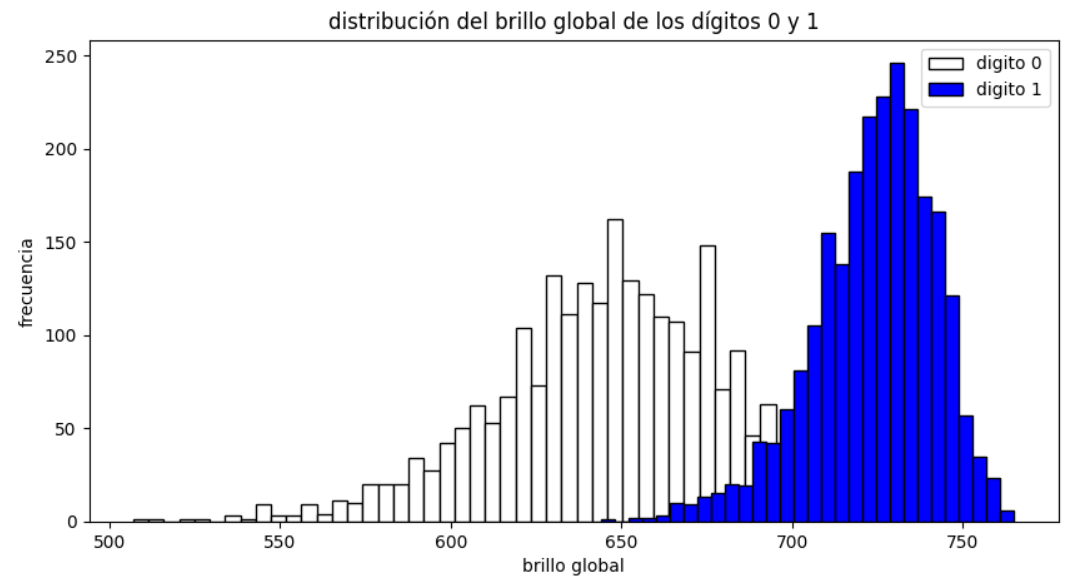

In [5]:
# Figura 2
display(Image(filename='./2_imagenes/brillo_global_hist.png', width=800))

De los histogramas anteriores, es notable la diferencia en los valores del brillo global de estos dígitos.

Como información *a priori* para este problema, conocemos que el número de dígitos para cada clase es el mismo, por lo tanto se cumple que las **probabilidades a priori** son:
$$p(0) = p(1) = 0.5$$

Para las **probabilidades condicionales** se puede utilizar una *función de densidad de probabilidad* que se aproxime las distribuciones de los datos de estos histogramas.

Como podemos ver, ambas distribuciones pueden aproximarse mediante distribuciones normales o gaussianas.

A continuación, se muestran las densidades de los histogramas ( $frecuencia/ (n_i * bin\_width)$ ) junto con las funciones de densidad de probabilidad gaussianas.

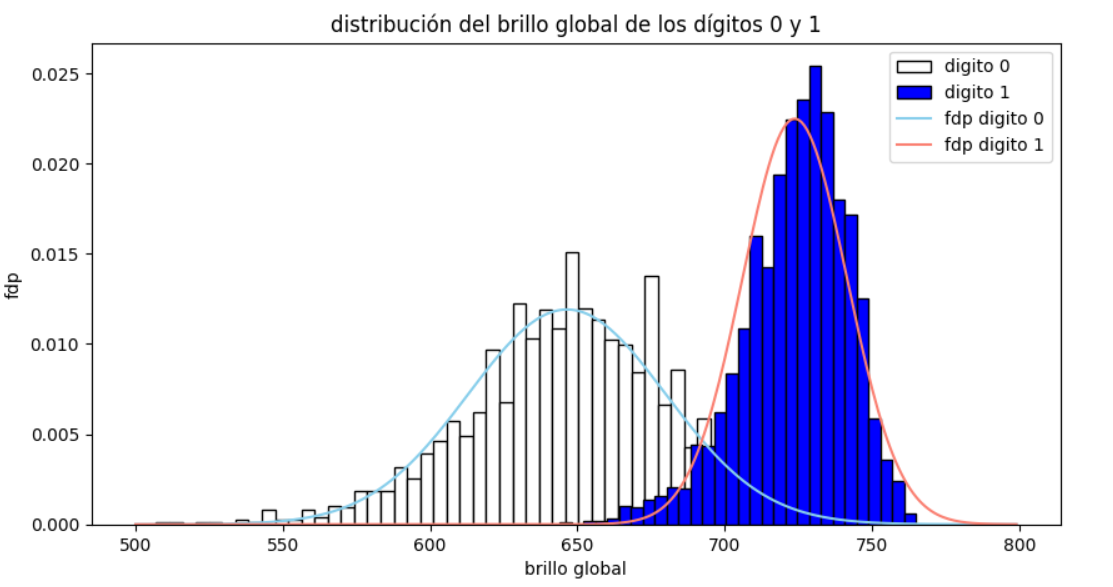

In [6]:
#Figura 3
display(Image(filename='./2_imagenes/fdp.png', width=900))

A la izquierda podemos observar las probabilidades condicionales y a la derecha las probabilidades conjuntas y la probabilidad marginal resultante

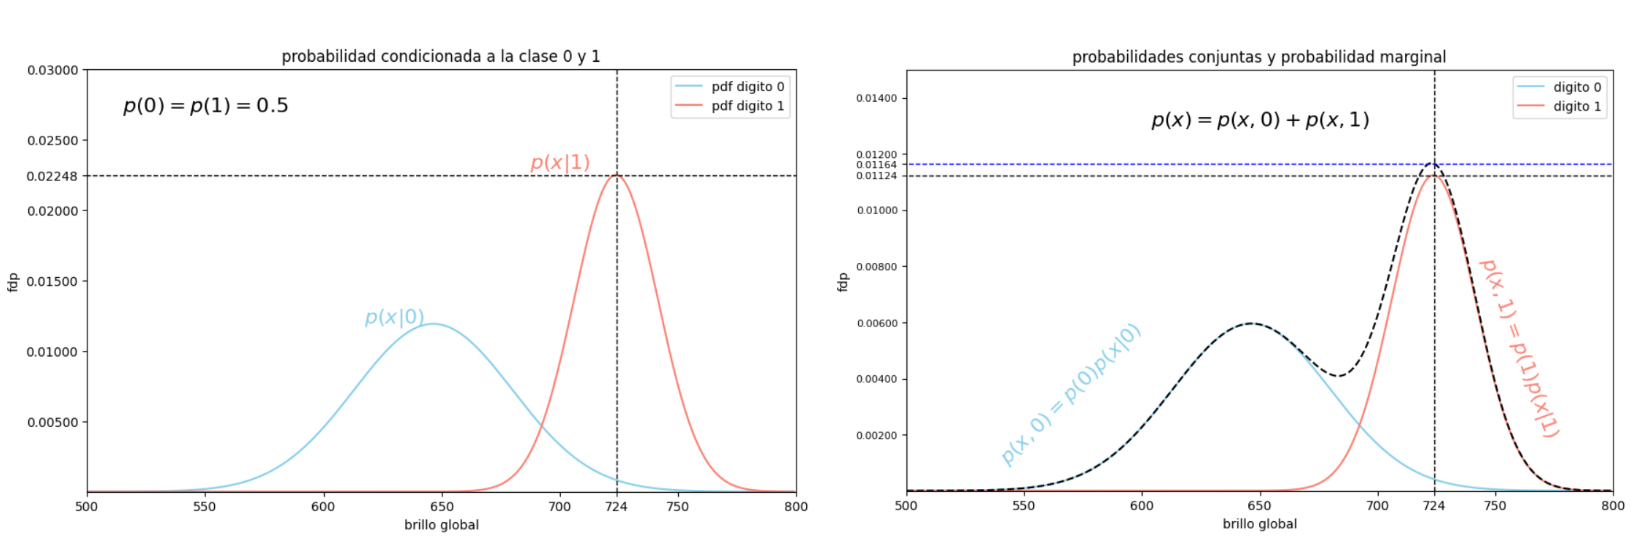

In [7]:
#Figura 4
display(Image(filename='./2_imagenes/prob_conjunta_marginal.png', width=1500))

Luego, con las probabilidades conjuntas por clase y la probabilidad marginal podemos obtener la probabilidad a posteriori para cada clase

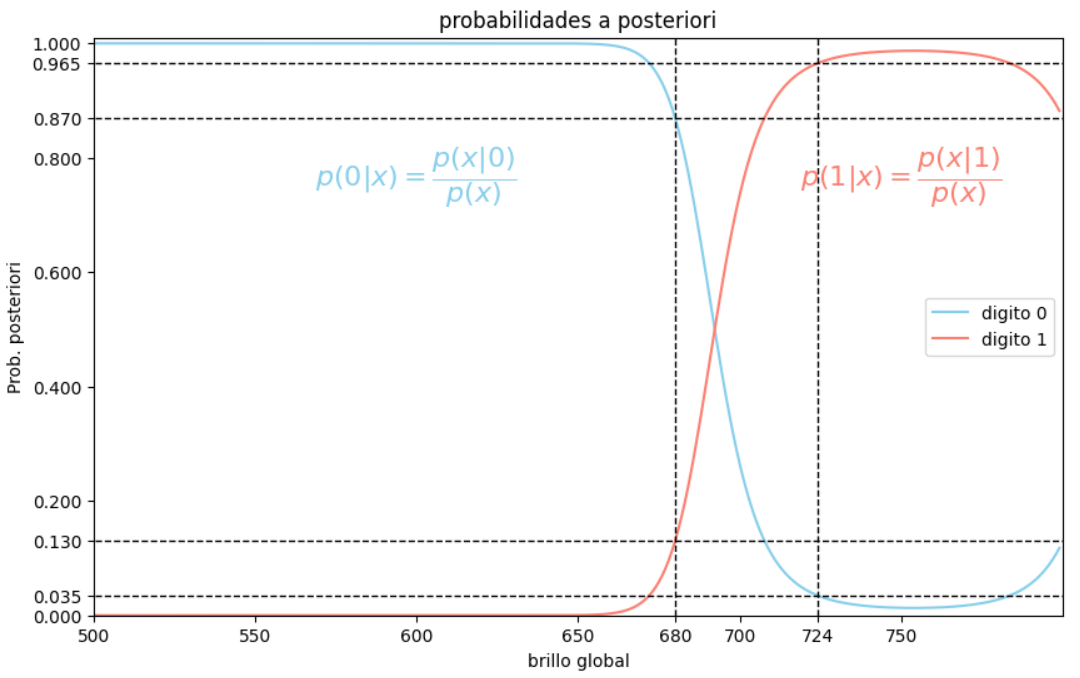

In [8]:
#Figura 5
display(Image(filename='./2_imagenes/posteriori.png', width=900))

## Actividades Prácticas

En el archivo `digitos_0_1.csv` de la carpeta `1_datos` se tienen dígitos manuscritos del 0 y 1. Reproduzca el análisis anterior para obtener un clasificador de Bayes que use como probabilidad condicional una distribución normal.


1. Cargue los datos y sepárelos en entrenamiento y prueba (20%). Use `random_state=0`. Separe predictores y etiquetas.

In [9]:
df_digitos = pd.read_csv("./1_datos/digitos_0_1.csv", index_col=False)
df_digitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 785 entries, 0 to target
dtypes: float64(784), int64(1)
memory usage: 35.9 MB


In [10]:
df_digitos.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
count,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,...,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500042
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [11]:
from sklearn.model_selection import train_test_split
y = df_digitos['target']
X = df_digitos.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

2. Binarice los datos usando el umbral 127, de modo que las intensidades superiores al umbral sean iguales a 1 y las menores iguales a 0.

In [12]:
import numpy as np

X_train = np.where(X_train > 127, 1, 0)

3. Visualice los 15 primeros dígitos del conjunto de entrenamiento. Puede utilizar la función [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib con el parámetro `cmap='binary'`

In [13]:
import matplotlib.pyplot as plt


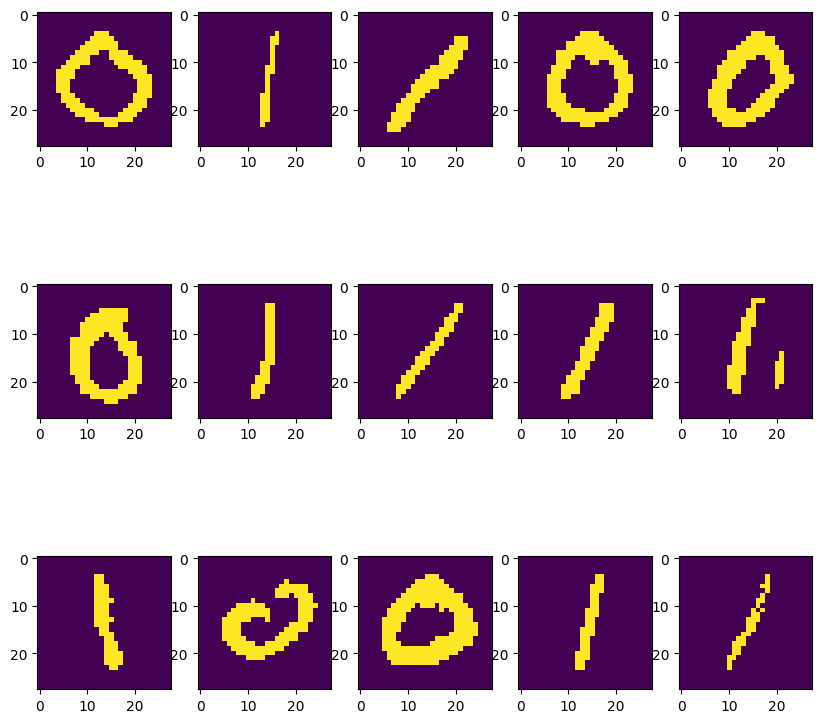

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(10, 10))
for i in range(15):
    # plt.imshow(X_train[i].reshape(28, 28))
    axs[i//5, i%5].imshow(X_train[i].reshape(28, 28))
plt.show()

4. Implemente una función para calcular el brillo global de una imagen que devuelva la suma de los píxeles blancos (iguales a 0). Aplique esta función a cada dígito del conjunto de datos para transformarlo a un conjunto de una única característica. Utilice la función [np.apply_along_axis](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html)

Grafique la distribución del brillo global para cada clase (dígito 0 y dígito 1) usando histogramas, replicando la Figura2.

In [15]:
# Define la función para calcular el brillo global de una imagen
def global_brightness(image):
    return np.sum(image == 0) # calcula la suma de los píxeles blancos (iguales a 0) de cada imagen

# Aplica la función a cada dígito del conjunto de datos
X_train_brightness = np.apply_along_axis(global_brightness, 1, X_train)

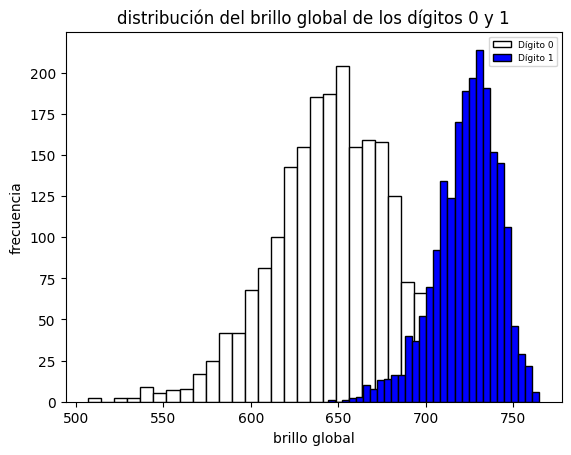

In [16]:
# Grafica la distribución del brillo global para cada clase (dígito 0 y dígito 1) usando histogramas
plt.title('distribución del brillo global de los dígitos 0 y 1')
plt.hist(X_train_brightness[y_train == 0], bins=30, label='Dígito 0', color='white', edgecolor='black')
plt.hist(X_train_brightness[y_train == 1], bins=30, label='Dígito 1', color='blue', edgecolor='black')
plt.legend(loc='upper right', fontsize=6.5)
plt.xlabel('brillo global')
plt.ylabel('frecuencia')
plt.show()

5. Calcule la probabilidad a priori para cada clase a partir del conjunto de datos de entrenamiento. También obtenga la media y el desvío estándar de los datos para cada clase.

In [17]:
class_counts = np.bincount(y_train)
class_priors = class_counts / len(y_train)
class_means = []
class_stds = []
for i in range(10):
    class_data = X_train_brightness[y_train == i]
    class_means.append(np.mean(class_data))
    class_stds.append(np.std(class_data))

c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rco

In [18]:
print('Class Priors:', class_priors)
print('Class Means:', class_means)
print('Class Standard Deviations:', class_stds)

Class Priors: [0.5 0.5]
Class Means: [645.99, 723.6042857142858, nan, nan, nan, nan, nan, nan, nan, nan]
Class Standard Deviations: [33.75139355147676, 17.85310645809523, nan, nan, nan, nan, nan, nan, nan, nan]


6. Utilice la media y desvío por clase para aproximar la distribución de los datos usando una función de densidad probabilística gaussiana. Esta representa la probabilidad condicional a cada clase.

Utilice para estas distribuciones la función [scipy.stats.norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

Grafique nuevamente los histogramas con el parámetro `density=True` superpuestos con las distribuciones obtenidas. El resultado debe ser similar a la Figura3. Después, replique la gráfica a la derecha de la Figura4. Verifique el resultado del valor de brillo marcado en la gráfica.

In [19]:
from scipy.stats import norm

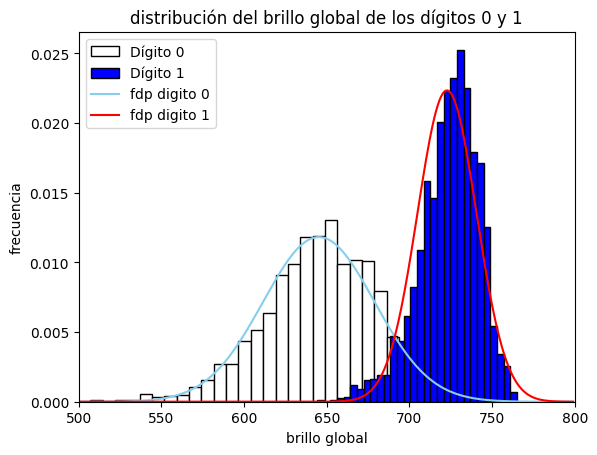

In [20]:
plt.title('distribución del brillo global de los dígitos 0 y 1')
plt.hist(X_train_brightness[y_train == 0], bins=30, label='Dígito 0', color='white', edgecolor='black', density=True)
plt.hist(X_train_brightness[y_train == 1], bins=30, label='Dígito 1', color='blue', edgecolor='black', density=True)
x = np.linspace(0, 800, 800)
plt.plot(norm.pdf(x, class_means[0], class_stds[0]), label='fdp digito 0', color='skyblue', linewidth=1.5)
plt.plot(norm.pdf(x, class_means[1], class_stds[1]), label='fdp digito 1', color='red', linewidth=1.5)
plt.legend(loc='upper right', fontsize=6.5)
plt.xlabel('brillo global')
plt.ylabel('frecuencia')
plt.xlim(500, 800)
plt.legend()
plt.show()

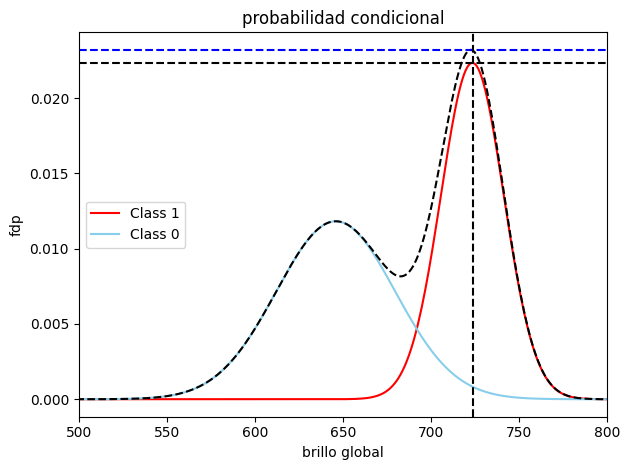

In [21]:
plt.title('probabilidad condicional')
x = np.linspace(0, 800, 800)
plt.plot(x, (norm.pdf(x, class_means[1], class_stds[1])), label='Class 1', color='red')
plt.plot(x, norm.pdf(x, class_means[0], class_stds[0]), label='Class 0', color='skyblue')
plt.plot(x, norm.pdf(x, class_means[1], class_stds[1])+norm.pdf(x, class_means[0], class_stds[0]), color='k', linestyle='dashed')
max_point = np.argmax(norm.pdf(x, class_means[1], class_stds[1]))
plt.axhline(norm.pdf(x, class_means[1], class_stds[1])[max_point], color='k', linestyle='dashed')
max_point2 = np.argmax(norm.pdf(x, class_means[1], class_stds[1])+norm.pdf(x, class_means[0], class_stds[0]))
plt.axhline((norm.pdf(x, class_means[1], class_stds[1])+norm.pdf(x, class_means[0], class_stds[0]))[max_point2], color='b', linestyle='dashed')
plt.axvline(724, color='k', linestyle='dashed')
plt.legend()
plt.xlabel('brillo global')
plt.ylabel('fdp')
plt.xlim(500, 800)
plt.tight_layout()
plt.show()

7. Calcule la probabilidad conjunta de cada clase usando la probabilidad a priori y la probabilidad condicional.

Calcule la probabilidad marginal a partir de la suma de las anteriores. Grafique las probabilidades conjuntas por clase superpuestas con la probabilidad marginal replicando la gráfica izquierda de la Figura4. Verifique los resultados del valor de brillo marcado en la gráfica.

In [22]:
prob_conj0 = (norm.pdf(x, class_means[0], class_stds[0]))*0.5
prob_conj1 = (norm.pdf(x, class_means[1], class_stds[1]))*0.5
prob_marg = prob_conj0+prob_conj1


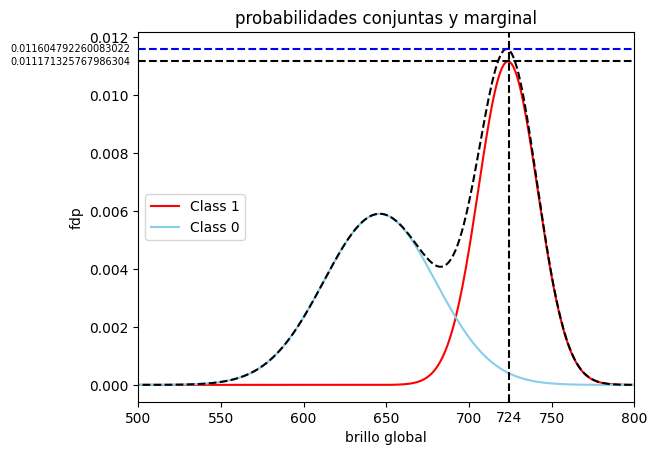

In [23]:
plt.title('probabilidades conjuntas y marginal')
x = np.linspace(0, 800, 800)
plt.plot(x, prob_conj1, label='Class 1', color='red')
plt.plot(x, prob_conj0, label='Class 0', color='skyblue')
plt.plot(x, prob_marg, color='k', linestyle='dashed')
max_point = np.argmax(prob_conj1)
plt.axhline(prob_conj1[max_point], color='k', linestyle='dashed')
max_point2 = np.argmax(prob_marg)
plt.axhline(prob_marg[max_point2], color='b', linestyle='dashed')
plt.axvline(724, color='k', linestyle='dashed')
plt.text(724, -0.00115, '724', ha='center', va='center')
plt.text(495, ((norm.pdf(x, class_means[1], class_stds[1])+norm.pdf(x, class_means[0], class_stds[0]))*0.5)[max_point2], ((norm.pdf(x, class_means[1], class_stds[1])+norm.pdf(x, class_means[0], class_stds[0]))*0.5)[max_point2], ha='right', va='center',fontsize=7)
plt.text(495, ((norm.pdf(x, class_means[1], class_stds[1]))*0.5)[max_point], ((norm.pdf(x, class_means[1], class_stds[1]))*0.5)[max_point], ha='right', va='center',fontsize=7)
plt.legend()
plt.xlabel('brillo global')
plt.ylabel('fdp')
plt.xlim(500, 800)
plt.show()

8. Calcule las probabilidades a posteriori para cada clase usando la regla de Bayes. Replique la Figura5.

$$
P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)} = \frac{P(x|w_i)P(w_i)}{\sum\limits_{j=1}^{c}P(x|w_j)P(w_j)}
$$

In [24]:
prob_posteriori0 = prob_conj0/prob_marg
prob_posteriori1 = prob_conj1/prob_marg

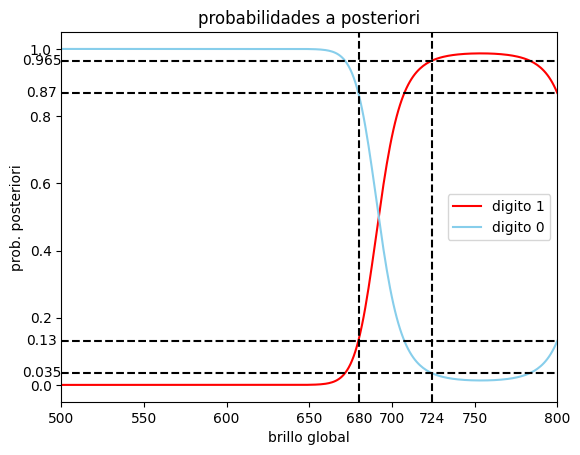

In [25]:
plt.title('probabilidades a posteriori')
plt.plot(x, prob_posteriori1, label='digito 1', color='red')
plt.plot(x, prob_posteriori0, label='digito 0', color='skyblue')
plt.xlim(500, 800)
plt.legend()
plt.xlabel('brillo global')
plt.ylabel('prob. posteriori')
plt.axvline(724, color='k', linestyle='dashed')
plt.text(724, -0.1, '724', ha='center', va='center')
plt.axvline(680, color='k', linestyle='dashed')
plt.text(680, -0.1, '680', ha='center', va='center')
plt.axhline(0.13, color='k', linestyle='dashed')
plt.text(488, 0.13, '0.13', ha='center', va='center')
plt.axhline(0.87, color='k', linestyle='dashed')
plt.text(488, 0.87, '0.87', ha='center', va='center')
plt.axhline(0.965, color='k', linestyle='dashed')
plt.text(488, 0.965, '0.965', ha='center', va='center')
plt.axhline(0.035, color='k', linestyle='dashed')
plt.text(488, 0.035, '0.035', ha='center', va='center')
plt.show()

9. Con las probabilidades a posteriori calculadas, Obtenga las predicciones con los datos de prueba y compárelas con sus etiquetas. Qué desempeño en tasa de aciertos obtiene?

In [26]:
y_prepred = []
X_test_brightness = np.apply_along_axis(global_brightness, 1, X_test)

for i in X_test_brightness:
    predict0 = prob_posteriori0[i]
    predict1 = prob_posteriori1[i]
    y_prepred.append([predict0, predict1])


In [27]:
y_pred = np.argmax(y_prepred, axis=1)

In [28]:
from sklearn.metrics import accuracy_score

# Calcula la tasa de aciertos de las predicciones del clasificador
tasa_aciertos = accuracy_score(y_test, y_pred)

print(f'Tasa de aciertos: {tasa_aciertos:.2f}')

Tasa de aciertos: 0.84


10. Compare el desempeño obtenido usando la clase [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
# Create a GaussianNB classifier
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy_rate = gnb.score(X_test, y_test)
print('Accuracy rate:', accuracy_rate)

Accuracy rate: 0.9761111111111112


c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
